### 時間序列預測方法
References
- [時間序列預測方法](https://medium.com/r-%E8%AA%9E%E8%A8%80%E8%87%AA%E5%AD%B8%E7%B3%BB%E5%88%97/r%E8%AA%9E%E8%A8%80%E8%87%AA%E5%AD%B8%E6%97%A5%E8%A8%98-10-%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E9%A0%90%E6%B8%AC%E6%96%B9%E6%B3%95-5aef00a9c997)

In [65]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [81]:
data = pd.read_csv('../../data/2330.TW.csv')#.iloc[:350]
data = data[pd.notna(data['Close'])]
data = data.rename(columns={col:col.lower() for col in data.columns})
data['date'] = data['date'].astype('datetime64[ns]')
data.head()

,date,open,high,low,close,adj close,volume
0,2016-09-05,176.5,177.5,176.5,177.0,149.055511,22381000.0
1,2016-09-06,177.0,179.0,176.5,178.0,149.897614,26024000.0
2,2016-09-07,180.5,185.0,180.0,185.0,155.792465,49761000.0
3,2016-09-08,182.5,184.5,182.5,183.0,154.108215,30204000.0
4,2016-09-09,181.0,181.0,179.5,180.5,152.002930,29793000.0


#### 指數平滑法
- 移動平均法（Moving Average）是去近$k$期資料取平均值。
- 指數平滑法（Exponential Smoothing）則是考慮了全期平均與移動平均值，針對近期資料給以權重值來分配兩者的重要性。
    - 一期指數平滑值
        - $\begin{align} s_t = \alpha x_t + (1 - \alpha) s_{t-1}; s_0=x_0; \alpha=Smoothing Weighting \end{align}$
        - 第$t$期平滑值 $s_{t}$ 是上一期平滑值與當期資料的加權平均。
        - $\alpha$ 越大，著重於當期觀測值而忽略前一期平滑值的權重越大。
    - 可推廣到二、三或更大的指數平滑值

In [82]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

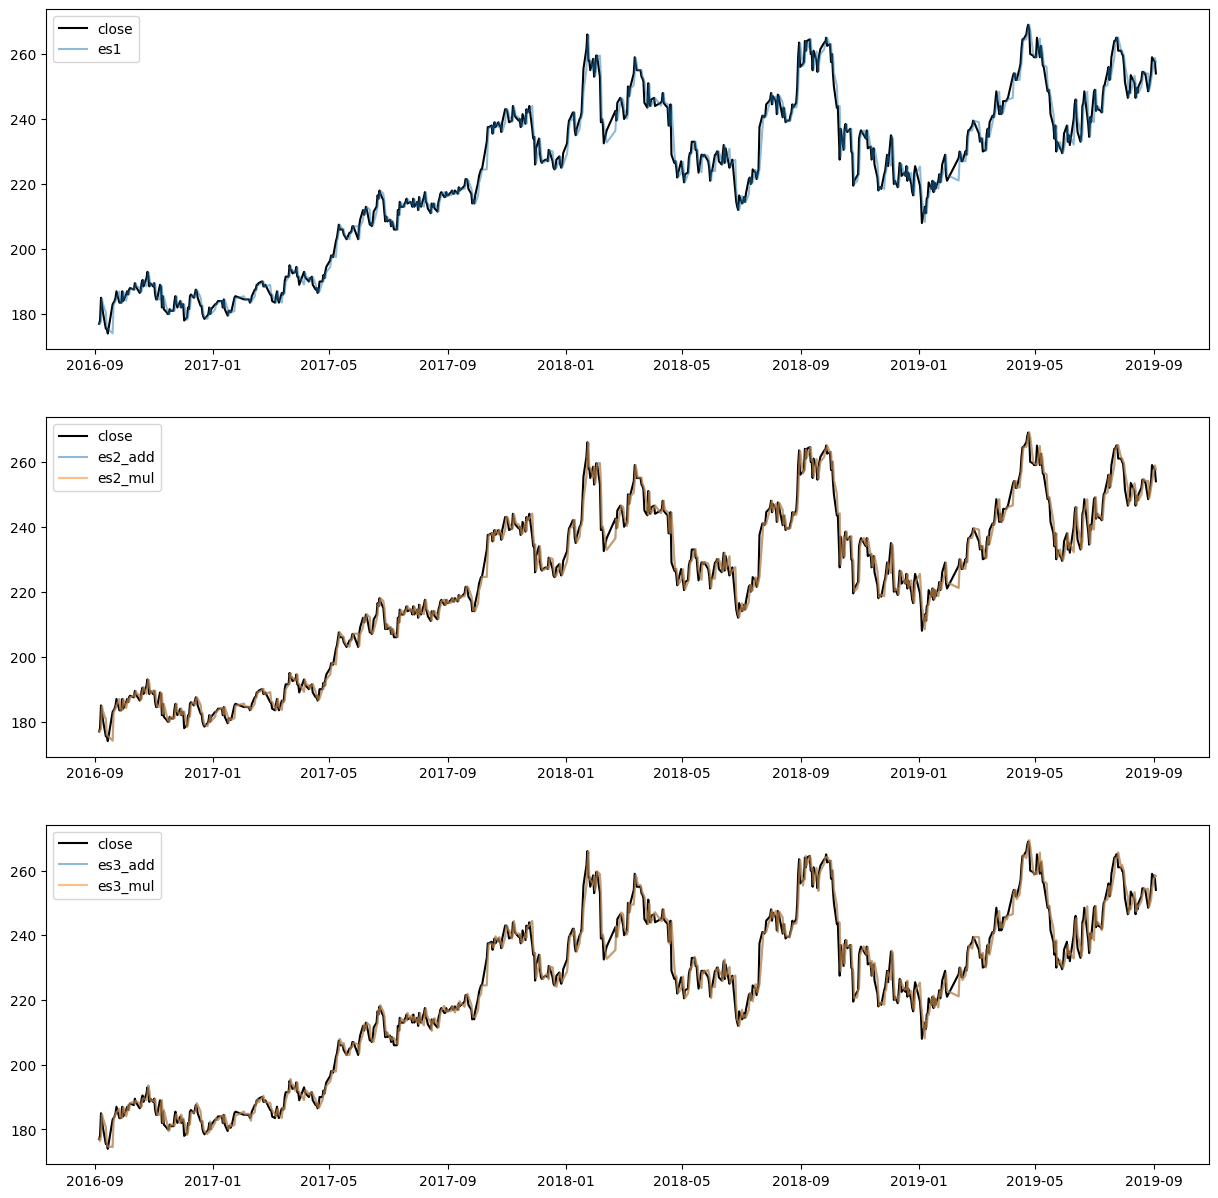

In [83]:
plt.figure(figsize=(15, 15))

m = 12
alpha = 1/(2*m)

data['es1'] = SimpleExpSmoothing(data['close']).fit().fittedvalues
plt.subplot(311)
plt.plot(data['date'], data['close'], color='black', label='close')
plt.plot(data['date'], data['es1'], alpha=0.5, label='es1')
plt.legend()

plt.subplot(312)
data['es2_add'] = ExponentialSmoothing(data['close'], trend='add').fit().fittedvalues
data['es2_mul'] = ExponentialSmoothing(data['close'], trend='mul').fit().fittedvalues
plt.plot(data['date'], data['close'], color='black', label='close')
plt.plot(data['date'], data['es2_add'], alpha=0.5, label='es2_add')
plt.plot(data['date'], data['es2_mul'], alpha=0.5, label='es2_mul')
plt.legend()

plt.subplot(313)
data['es3_add'] = ExponentialSmoothing(data['close'], trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
data['es3_mul'] = ExponentialSmoothing(data['close'], trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues
plt.plot(data['date'], data['close'], color='black', label='close')
plt.plot(data['date'], data['es3_add'], alpha=0.5, label='es3_add')
plt.plot(data['date'], data['es3_mul'], alpha=0.5, label='es3_mul')
plt.legend()

#### 季節性預測 - Naive Method

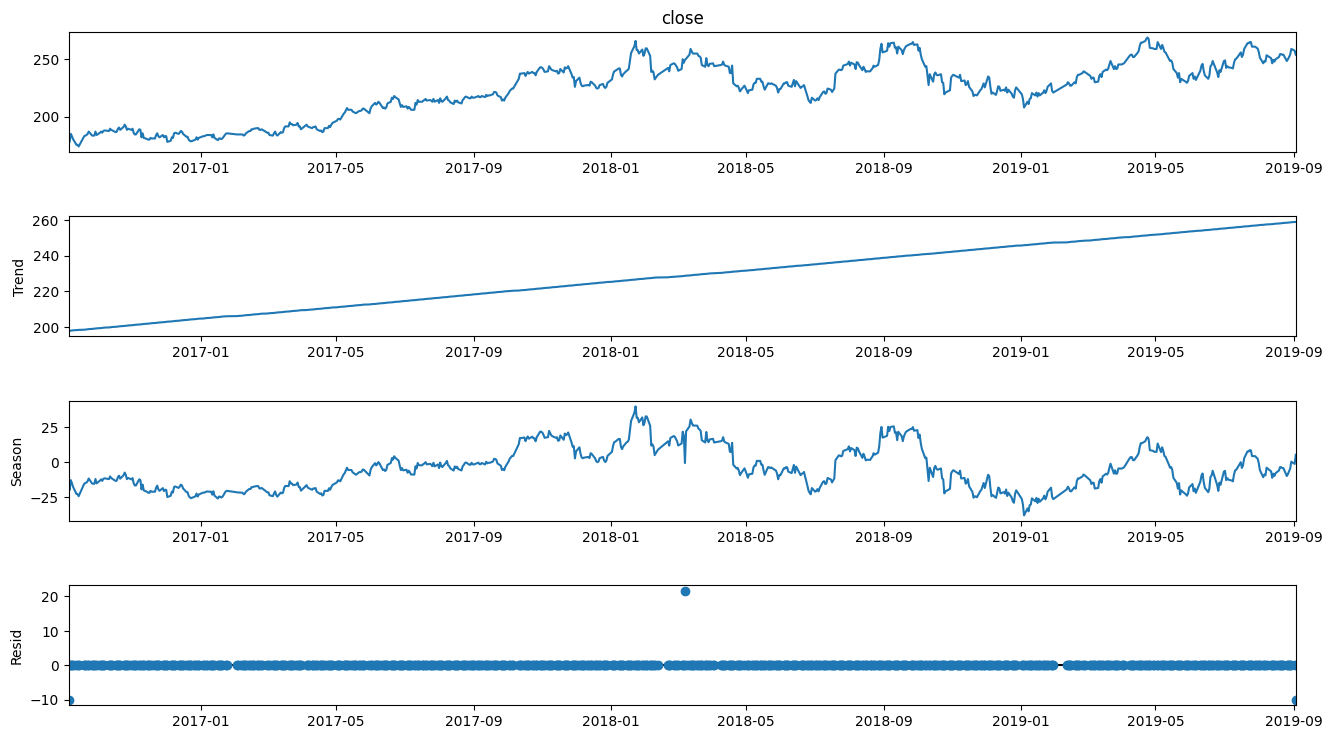

In [84]:
X = data['close']
X.index = np.array(data['date'])

stl = STL(X, period=365)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(15, 8)

<Figure size 640x480 with 0 Axes>

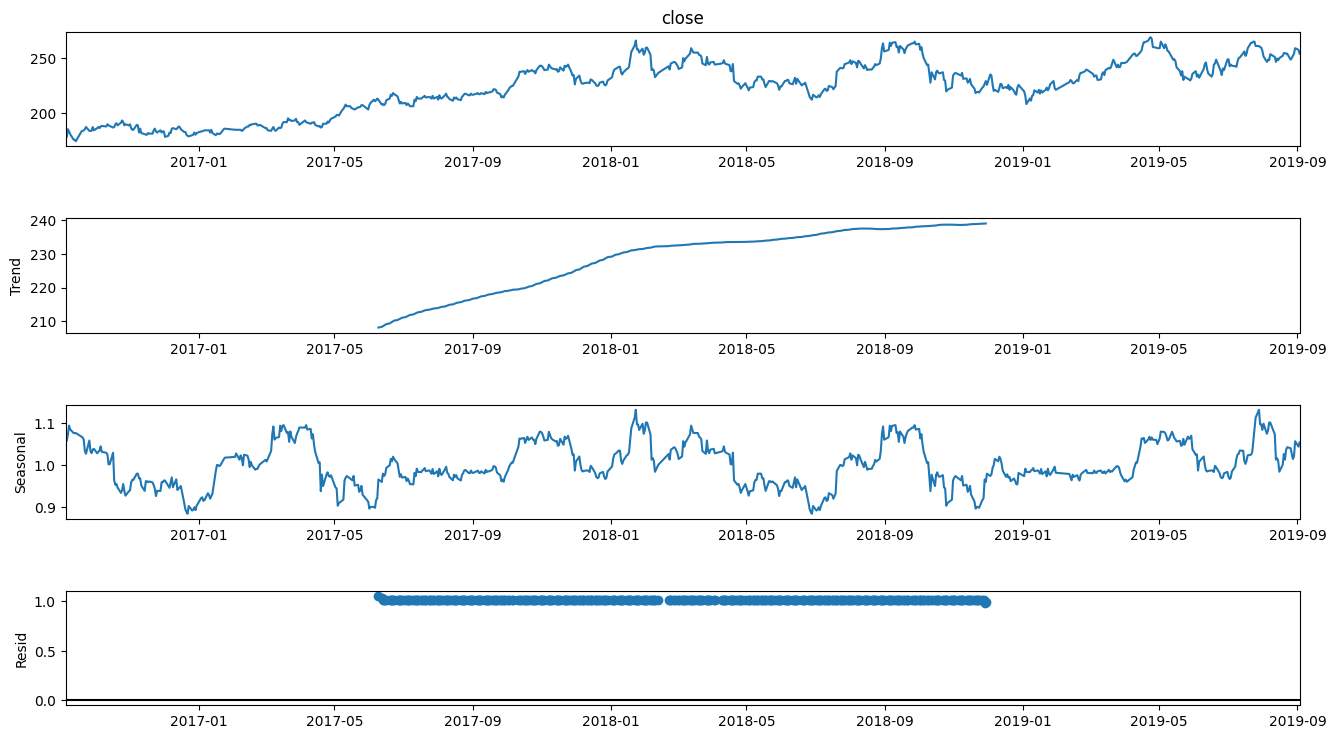

In [85]:
stl = seasonal_decompose(X, model='multiplicative', period=365)
fig = plt.figure()  
fig = stl.plot()  
fig.set_size_inches(15, 8)